# **Lakukan penerapan metode clustering Hierarchical menggunakan pendekatan single link, complete link, average link, dan ward.**

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

Clustering with k =  2
Silhouette_score Single linkage : 0.5613098894353034
Silhouette_score Complete linkage : 0.5613098894353034
Silhouette_score Average linkage : 0.5712152665237002
Silhouette_score Ward linkage : 0.5712152665237002


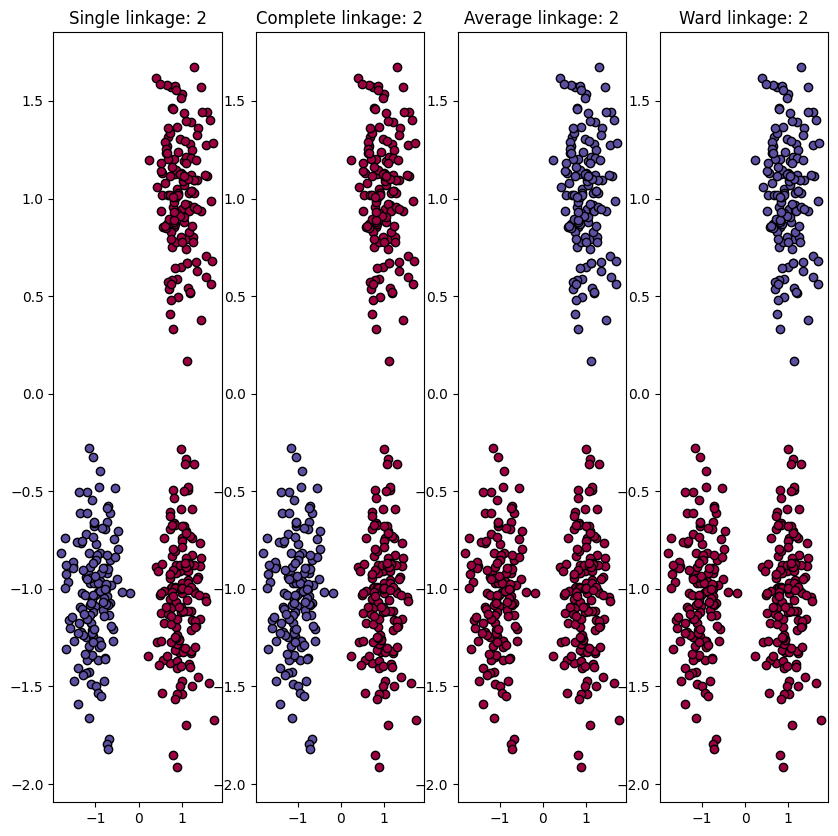


Clustering with k =  3
Silhouette_score Single linkage : 0.35578598857685384
Silhouette_score Complete linkage : 0.35578598857685384
Silhouette_score Average linkage : 0.35578598857685384
Silhouette_score Ward linkage : 0.5613098894353034


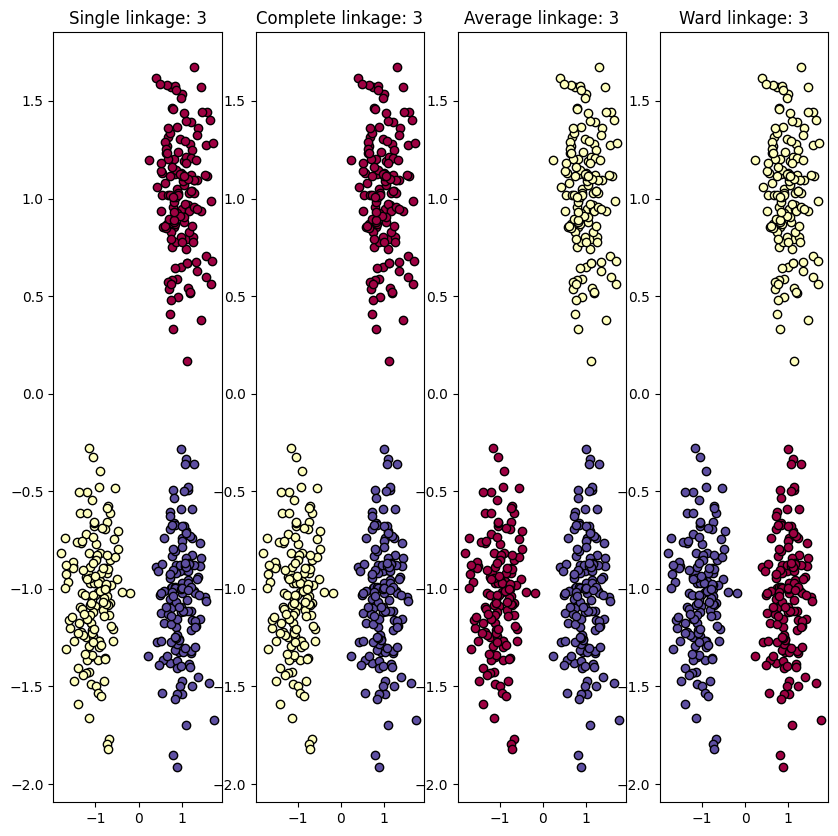


Clustering with k =  4
Silhouette_score Single linkage : -0.1516881898989416
Silhouette_score Complete linkage : 0.016361626874703543
Silhouette_score Average linkage : 0.040171660137137515
Silhouette_score Ward linkage : 0.0012514608245967165


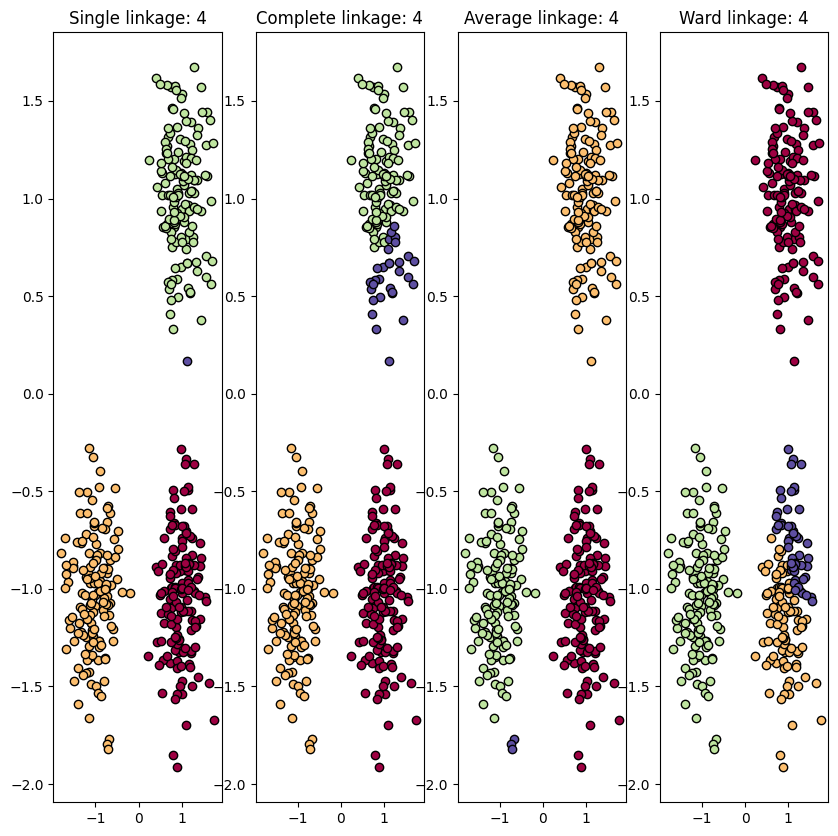


Clustering with k =  5
Silhouette_score Single linkage : 0.03280956153571439
Silhouette_score Complete linkage : 0.04088151923249475
Silhouette_score Average linkage : 0.33281589981856546
Silhouette_score Ward linkage : 0.15004046329206694


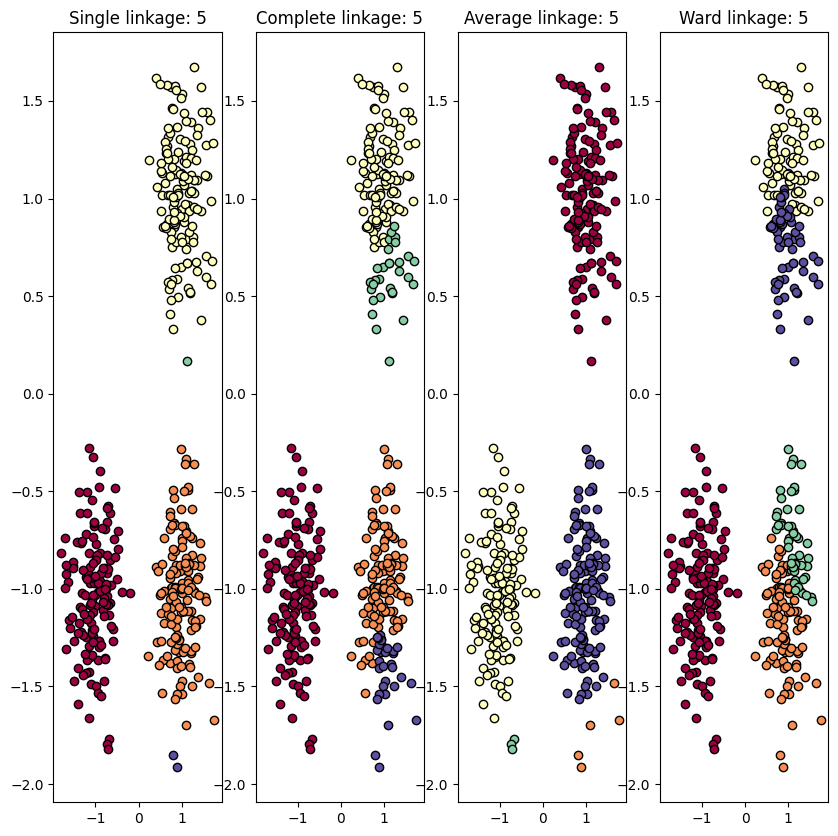


Clustering with k =  6
Silhouette_score Single linkage : 0.5498903716006656
Silhouette_score Complete linkage : 0.3213172015481256
Silhouette_score Average linkage : 0.08561886278218551
Silhouette_score Ward linkage : 0.1949086124870936


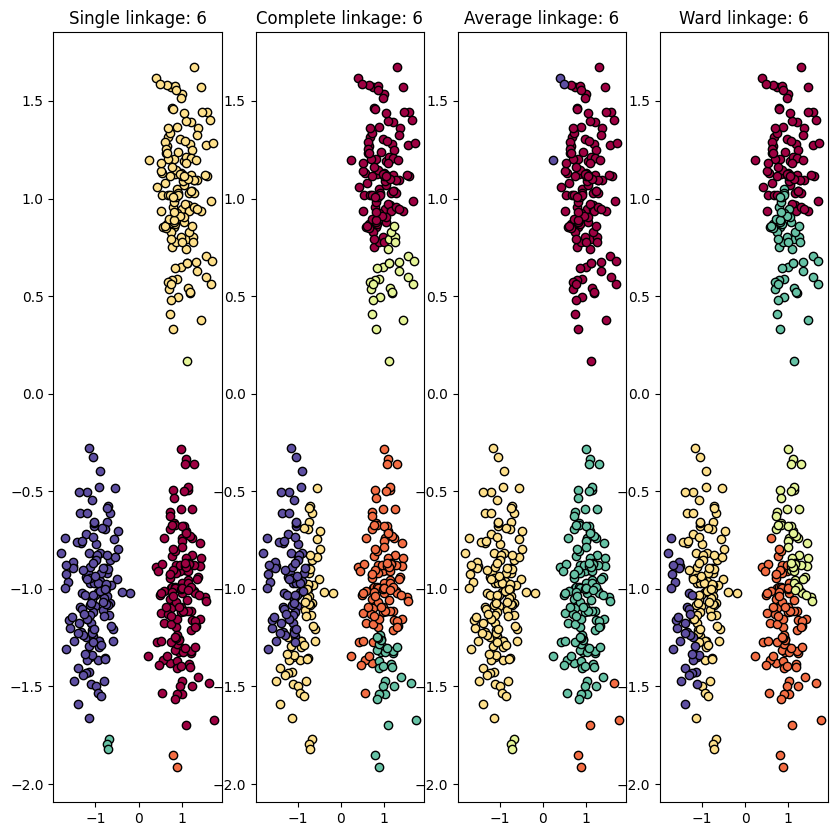


Clustering with k =  7
Silhouette_score Single linkage : 0.33745043747840825
Silhouette_score Complete linkage : 0.20142499465316063
Silhouette_score Average linkage : 0.003359966616656726
Silhouette_score Ward linkage : 0.14908513737994794


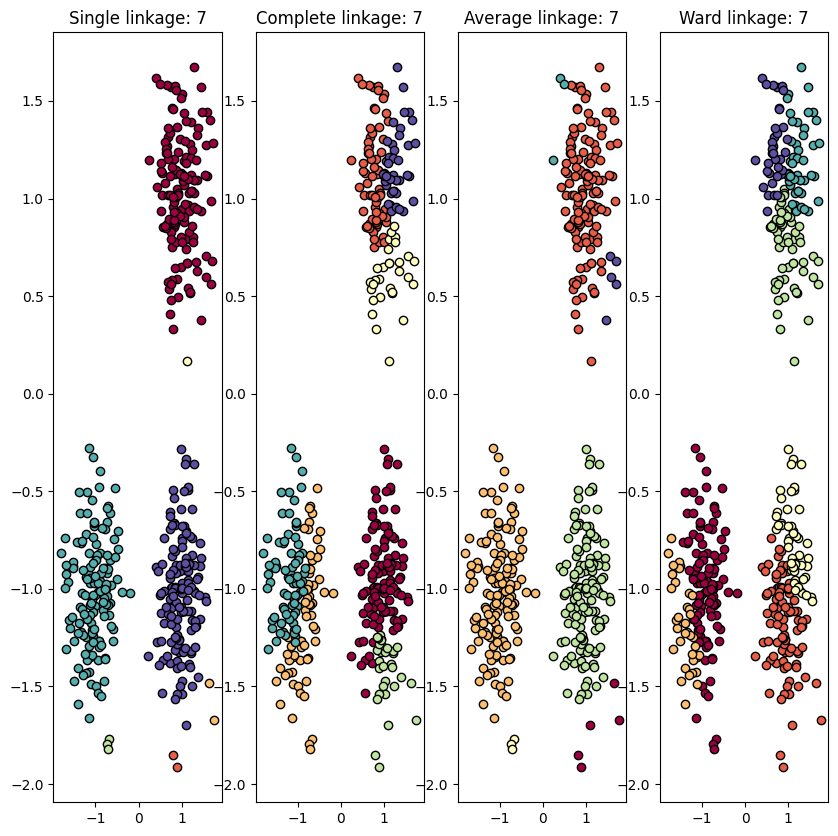


Clustering with k =  8
Silhouette_score Single linkage : -0.1516881898989416
Silhouette_score Complete linkage : -0.047306304468043285
Silhouette_score Average linkage : 0.040171660137137515
Silhouette_score Ward linkage : 0.05046909865549727


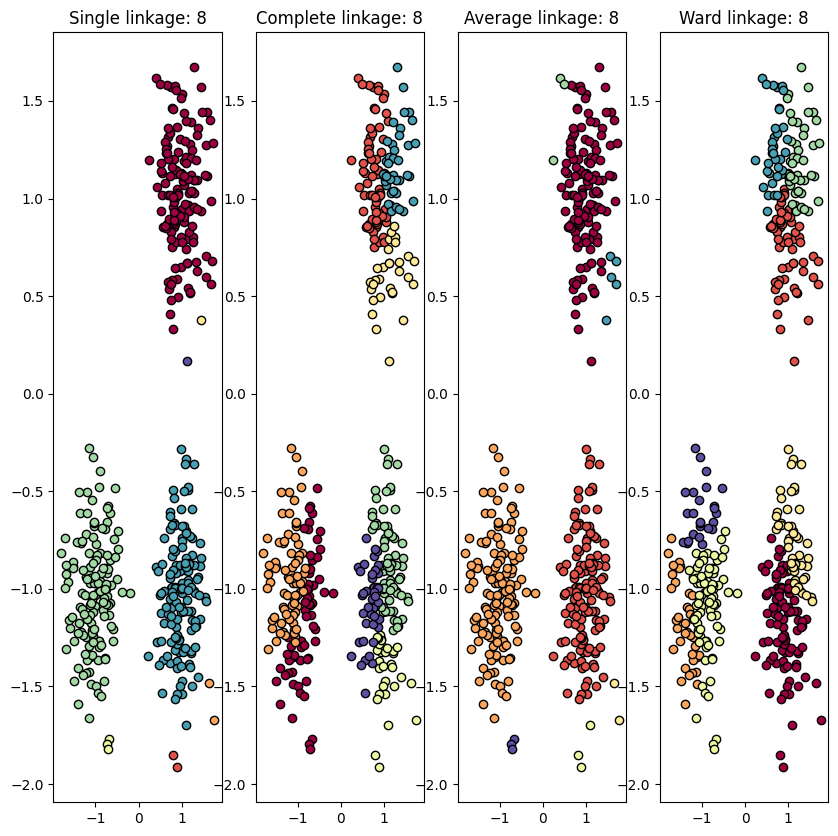


Clustering with k =  9
Silhouette_score Single linkage : -0.07090795894880932
Silhouette_score Complete linkage : 0.017662977231020463
Silhouette_score Average linkage : 0.10418929806539112
Silhouette_score Ward linkage : 0.0081815149916055


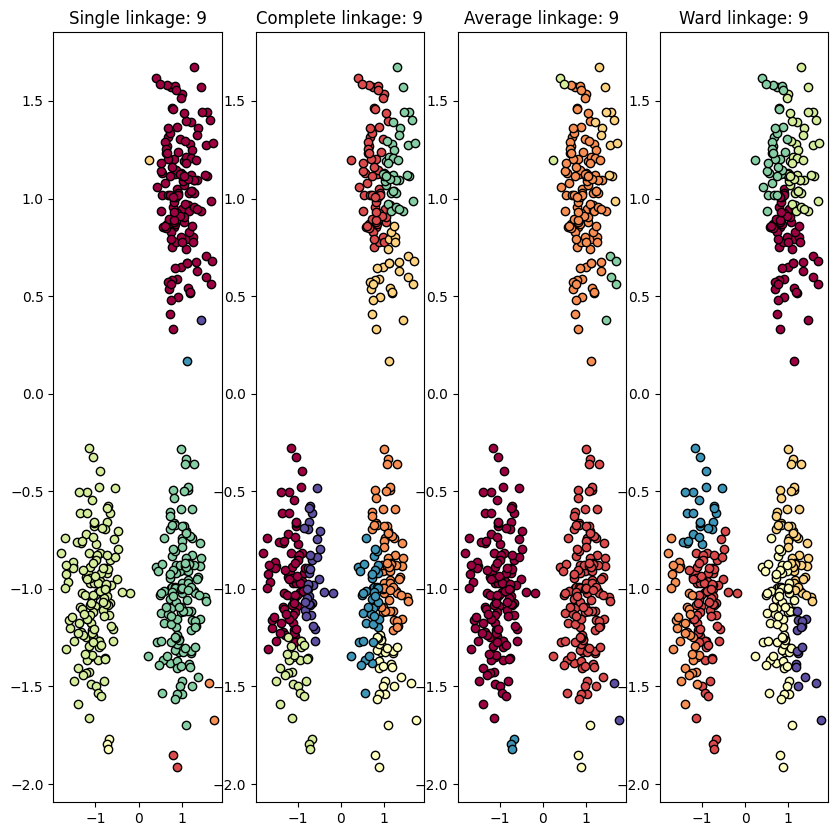


Clustering with k =  10
Silhouette_score Single linkage : 0.040171660137137515
Silhouette_score Complete linkage : 0.02795150833333351
Silhouette_score Average linkage : 0.027459425701083437
Silhouette_score Ward linkage : 0.004219861789808313


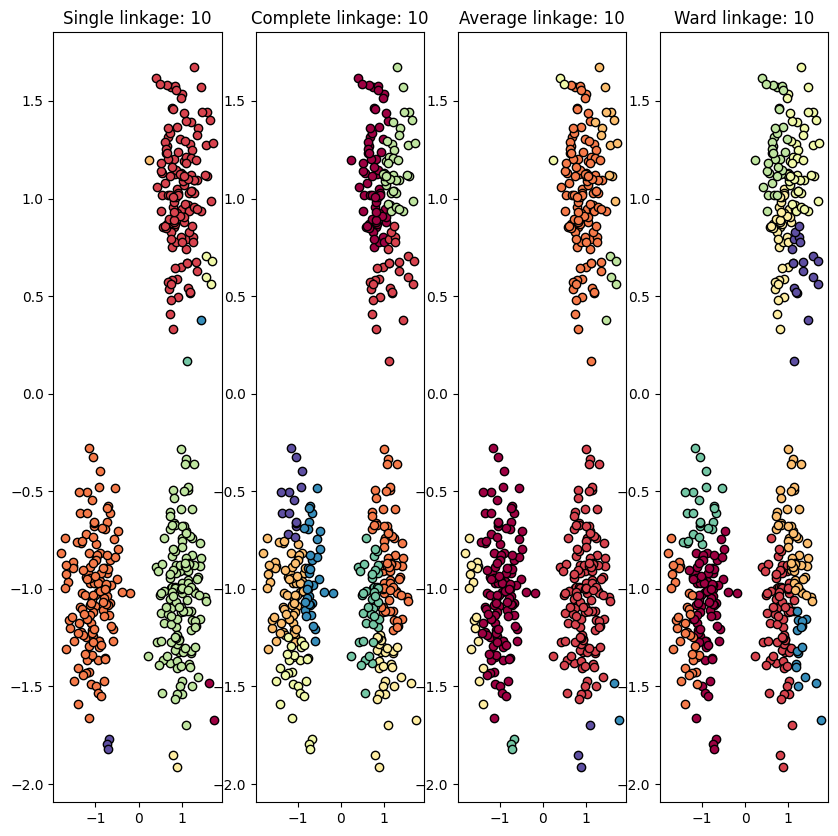

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs, make_circles, make_moons

# get data
data = pd.read_csv('./Wholesale customers data.csv')
print(data.head())

# Initialize graph
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=len(data), centers=centers, cluster_std=0.3, random_state=0)

K = [2, 3, 4, 5, 6, 7, 8, 9, 10]

n = 1

for k in K:
  plt.figure(figsize=(10, 10))
  plt.subplot(n, 4, 1)
  # Compute Agglomerative Single
  agglo_single = AgglomerativeClustering(linkage='single', n_clusters=k).fit(X)
  # Compute Agglomerative Complete
  agglo_complete = AgglomerativeClustering(linkage='complete', n_clusters=k).fit(X)
  # Compute Agglomerative Average
  agglo_avg = AgglomerativeClustering(linkage='average', n_clusters=k).fit(X)
  # Compute Agglomerative Ward
  agglo_ward = AgglomerativeClustering(linkage='ward', n_clusters=k).fit(X)

  unique_labels = set(agglo_single.labels_)
  colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
  for k, col in zip(unique_labels, colors):

      agglo_single_labels = (agglo_single.labels_ == k)

      xy = X[agglo_single_labels]
      plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

  plt.title('Single linkage: %d' % agglo_single.n_clusters)

# compute agglomerative clustering
  plt.subplot(n, 4, 2)
  unique_labels = set(agglo_complete.labels_)
  colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
  for k, col in zip(unique_labels, colors):
    agglo_complete_labels = (agglo_complete.labels_ == k)

    xy = X[agglo_complete_labels]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

  plt.title('Complete linkage: %d' % agglo_complete.n_clusters)

# average agglomerative clustering
  plt.subplot(n, 4, 3)
  unique_labels = set(agglo_avg.labels_)
  colors = [plt.cm.Spectral(each)
            for each in np.linspace(0, 1, len(unique_labels))]
  for k, col in zip(unique_labels, colors):
    agglo_avg_labels = (agglo_avg.labels_ == k)
    xy = X[agglo_avg_labels]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

  plt.title('Average linkage: %d' % agglo_avg.n_clusters)

# ward agglomerative clustering
  plt.subplot(n, 4, 4)
  unique_labels = set(agglo_ward.labels_)
  colors = [plt.cm.Spectral(each)
            for each in np.linspace(0, 1, len(unique_labels))]
  for k, col in zip(unique_labels, colors):
    agglo_ward_labels = (agglo_ward.labels_ == k)
    xy = X[agglo_ward_labels]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

  print('\nClustering with k = ',k+1)
  print("Silhouette_score Single linkage :", silhouette_score(X, agglo_single_labels))
  print("Silhouette_score Complete linkage :", silhouette_score(X, agglo_complete_labels))
  print("Silhouette_score Average linkage :", silhouette_score(X, agglo_avg_labels))
  print("Silhouette_score Ward linkage :", silhouette_score(X, agglo_ward_labels))
  
  plt.title('Ward linkage: %d' % agglo_ward.n_clusters)

  plt.show()
